# 线性回归

## 导入相关的计算和绘图包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 定义一个线性回归的类
该模型训练方法可以通过 fit () 函数中 train_method 参数进行选择，默认使用随机梯度下降法。

代价函数使用均方误差函数
$$ J(W) =\frac{1}{2m}[\sum_{i=1}^m(h_\theta(x^i)-y^i)^2 + \lambda\sum_{j=1}^n\theta_j^2]  $$
参数更新方式推导结果为：
$$ W = W*(1-\alpha\frac{\lambda}{m})-\alpha\frac{\lambda}{m}(\stackrel{\bigwedge}{Y}-Y)X^T $$
$$ b = b*(1-\alpha\frac{\lambda}{m})-\alpha\frac{\lambda}{m}(\stackrel{\bigwedge}{Y}-Y) $$

In [2]:
class Linear_Regression():
    def __init__(self):
        self.W = None
        self.bias = None
        self.learning_rate = None
        self.n_iters = None
        
    def train_sgd(self, X, Y, m, lam):
        '''使用梯度下降方法更新参数'''
        Y_hat = np.dot(self.W, X) + self.bias
        
        # 如果 lam 不为 None，就使用 L2正则化
        if lam is None:
            # 不适用L2正则化部分
            cost = np.sum(np.square(Y_hat - Y)) / 2*m
        
            dW = np.dot((Y_hat - Y), X.T) / m
            db = np.sum(Y_hat - Y) / m
            
            self.W = self.W - self.learning_rate * dW
            self.bias = self.bias - self.learning_rate * db
            
        else:
            # 使用 L2 正则化部分
            cost = np.sum(np.square(Y_hat - Y) + lam * np.sum(np.square(self.W))) / 2*m 
            
            dW = np.dot((Y_hat - Y), X.T) / m
            db = np.sum(Y_hat - Y) / m
            
            self.W = self.W * (1 - self.learning_rate * lam / m) - self.learning_rate * dW
            self.bias = self.bias * (1 - self.learning_rate *lam / m) - self.learning_rate * db
                  
        return cost
    
    def fit(self, X=None, Y=None, learning_rate=0.01, n_iters=100, train_method='sgd', plot_cost=True, lam=None):
        '''训练函数'''
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        
        # m 为样本个数， n为特征个数, result_dim 每个样本输出的维度
        m = X.shape[1]      
        n = X.shape[0]
        
        result_dim = Y.shape[0]
        
        # 初始化参数
        self.W = np.random.normal(size=(result_dim, n))
        self.bias = np.zeros((result_dim, 1))
        
        cost_ls = []
        
        # 训练阶段
        for i in range(self.n_iters):
            # 选择训练方法
            if train_method == 'sgd':
                cost = self.train_sgd(X, Y, m, lam)
            cost_ls.append(cost)
            
        # 如果 plot_cost 为 True，就绘制训练阶段损失函数值得变化曲线图
        if plot_cost == True:
            plt.plot(np.arange(self.n_iters), cost_ls)
            plt.title("Loss in Training")
            plt.xlabel("iter_num")
            plt.ylabel("loss_value")
            plt.show()
    
    def score(self, X_test, Y_test):
        if self.W is None or self.bias is None:
            raise NameError("未经过训练，参数没值")
        
        Y_hat = np.dot(self.W, X_test) + self.bias
        square_erros = np.sum(np.square(Y_hat - Y_test)) / 2*Y_test.shape[1]
        
        return square_erros
    
    def predict(self, X_pred):
        if self.W is None or self.bias is None:
            raise NameError("未经过训练，参数没值")
        
        Y_hat = np.dot(self.W, X_pred) + self.bias
        
        return Y_hat
    
    def get_params(self):
        '''返回模型参数'''
        return self.W, self.bias
            

## 生成一维的训练数据和测试数据并测试模型

In [3]:
def gen_one_dim_data(func, num, std):
    x = np.linspace(0, 1, num)
    x = np.expand_dims(x, 0)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    
    return x,y

def func(x):
    return 4.8 * x + 5.2

In [4]:
x_train, y_train =gen_one_dim_data(func, 10, 0.25)

x_test = np.expand_dims(np.linspace(0, 1, 20), 0)
y_test = func(x_test)

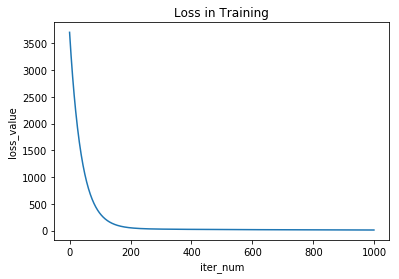

In [5]:
model_linear = Linear_Regression()
# 训练， 不使用L2 正则化，lam=None
model_linear.fit(x_train, y_train, n_iters=1000)

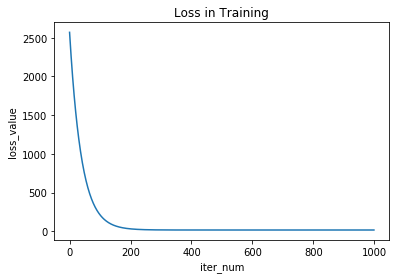

In [6]:
model_l2 = Linear_Regression()
# 训练，使用L2正则化， lam 设置为 0.01
model_l2.fit(x_train, y_train, n_iters=1000, lam=0.01)

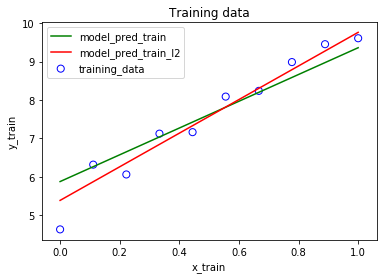

In [7]:
# 用训练好的模型在训练集上预测
pred_train = model_linear.predict(x_train)
pred_train_l2 = model_l2.predict(x_train)

# 在训练集上绘图
plt.title("Training data")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.scatter(x_train, y_train, facecolor="none", edgecolor='b', s=50, label="training_data")
plt.plot(x_train[0], pred_train[0], c='g', label="model_pred_train")
plt.plot(x_train[0], pred_train_l2[0], c='r', label="model_pred_train_l2")
plt.legend()
plt.show()

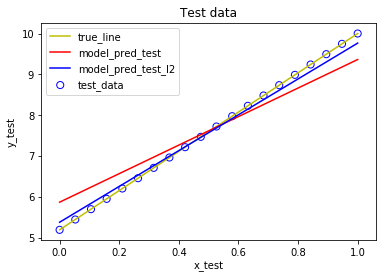

In [8]:
# 使用模型在测试集上预测
pred_test = model_linear.predict(x_test)
pred_test_l2 = model_l2.predict(x_test)
# 绘制测试集上的真实线，和模型预测线
plt.title("Test data")
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.scatter(x_test, y_test, facecolor='none', edgecolor='b', s=50, label='test_data')
plt.plot(x_test[0], y_test[0], c='y', label='true_line')
plt.plot(x_test[0], pred_test[0], c='r', label='model_pred_test')
plt.plot(x_test[0], pred_test_l2[0], c='b', label='model_pred_test_l2')
plt.legend()
plt.show()

## 生成多维特征的数据训练模型并测试

In [9]:
# 生成多维特征数据函数
def gen_mul_dim_data(func_mul, feature_n, example_m, std=0.25):
    x = np.random.normal(size=(feature_n, example_m))
    y_no_nosie, W, bias = func_mul(x)
    y = y_no_nosie + np.random.normal(scale=std, size=y_no_nosie.shape)
    
    return x, y, W, bias

def func_mul(x):
    W = np.random.normal(size=(1, x.shape[0]))
    bias = 7.2
    return np.dot(W, x) + bias, W, bias

In [10]:
x_train, y_train, W_train_true, bias_train_true =gen_mul_dim_data(func_mul, 7, 80)

x_test = np.random.normal(size=(7, 10))
y_test, W_test_true, bias_test_true = func_mul(x_test)

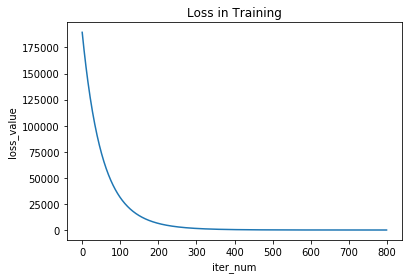

In [11]:
model_mul_linear = Linear_Regression()

model_mul_linear.fit(x_train, y_train, learning_rate=0.01, n_iters=800)

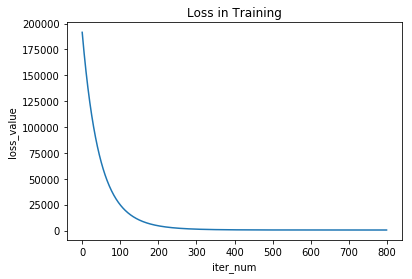

In [12]:
model_mul_linear_l2 = Linear_Regression()

model_mul_linear_l2.fit(x_train, y_train, learning_rate=0.01, n_iters=800, lam=0.01)

In [13]:
# 在训练集上比较 模型学的的参数与真实参数
W_train_model, bias_train_model = model_mul_linear.get_params()
print("W_train_model    : ", W_train_model)
print("W_train_true     : ", W_train_true)
print("bias_train_model : ", bias_train_model)
print("bias_train_true  : ", bias_train_true)
print()
print("-----------------L2--------------------------------")
W_train_model_l2, bias_train_model_l2 = model_mul_linear_l2.get_params()
print("W_train_model_l2    : ", W_train_model_l2)
print("W_train_true     : ", W_train_true)
print("bias_train_model_l2 : ", bias_train_model_l2)
print("bias_train_true  : ", bias_train_true)

W_train_model    :  [[-0.0960008  -1.34609485  1.44400135  1.8893736   0.92937953 -0.94805173
   0.333851  ]]
W_train_true     :  [[-0.08071423 -1.29464865  1.48632576  1.85714668  0.91820743 -0.9322251
   0.29810871]]
bias_train_model :  [[7.18175306]]
bias_train_true  :  7.2

-----------------L2--------------------------------
W_train_model_l2    :  [[-0.07868705 -1.34017938  1.44973859  1.92297223  0.91738087 -0.95781635
   0.32888157]]
W_train_true     :  [[-0.08071423 -1.29464865  1.48632576  1.85714668  0.91820743 -0.9322251
   0.29810871]]
bias_train_model_l2 :  [[7.18212221]]
bias_train_true  :  7.2


In [14]:
# 在测试集上比较 真实值和模型预测值
y_pred_test = model_mul_linear.predict(x_test)
print("pred_test : ", y_pred_test)
print("true_test : ", y_test)
score_test = model_mul_linear.score(x_test, y_test)
print("loss_on_test : ", score_test)

print()
print("-----------------L2--------------------------------")
y_pred_test_l2 = model_mul_linear_l2.predict(x_test)
print("pred_test_l2 : ", y_pred_test_l2)
print("true_test : ", y_test)
score_test_l2 = model_mul_linear_l2.score(x_test, y_test)
print("loss_on_test_l2 : ", score_test_l2)

pred_test :  [[9.59489117 6.08181677 9.70675301 6.93460586 9.88549967 8.41071045
  7.54834774 5.70054782 5.90347243 3.85392277]]
true_test :  [[9.81254187 9.69757272 7.46650188 5.11024887 7.60284083 6.27521323
  3.06227788 4.64984342 3.83620178 1.77096215]]
loss_on_test :  305.40040808691333

-----------------L2--------------------------------
pred_test_l2 :  [[9.59425206 6.06133755 9.74010969 6.93059642 9.90041671 8.42282235
  7.53445292 5.66494012 5.93016057 3.82875396]]
true_test :  [[9.81254187 9.69757272 7.46650188 5.11024887 7.60284083 6.27521323
  3.06227788 4.64984342 3.83620178 1.77096215]]
loss_on_test_l2 :  306.4691774656753
